In [6]:
from data_types import *
from simulator import *
from particles import *
from IPython.display import HTML
from matplotlib import animation, rc

## 1. n-body circular motion

In [2]:
table = setup(0.01, 3)
table.add_particle(1, [1, 0, 0],  [0, 0.5, 0.5])
table.add_particle(1, [-1, 0, 0],  [0, -0.5, 0.5])
# table.add_particle(1, [-1, 1, 0], [0, 0, 0])
sim = simulator(table)
sim.set_force("-G*m1*m2/(x**2)", {"G": 1})
sim.exec(500)

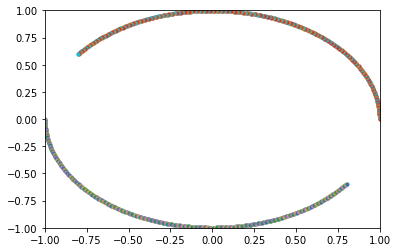

In [16]:
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))
def init():
    line.set_data([], [])
    return (line, )
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
def animate(i):
    ax.plot(x1[i], y1[i],'.', x2[i], y2[i], '.')
    return (line, )
anim = animation.FuncAnimation(fig, animate, init_func = init, frames = 500, interval=10, blit=True)
HTML(anim.to_html5_video())

In [17]:
rc('animation', html='html5')
anim

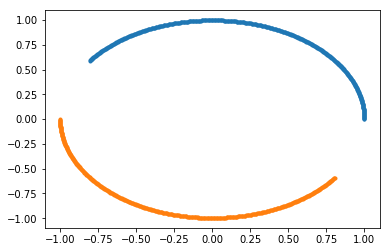

In [4]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
ax.plot(x1, y1,'.', x2, y2, '.')

In [5]:
table = setup(0.01, 3)
v = 1/np.sqrt(2 * np.sqrt(3))
print(v)
table.add_particle(1, [0, 2, 0],  [v, 0, 0])
table.add_particle(1, [-1 * np.sqrt(3), -1, 0],  [-1 * v * np.sin(np.pi/6), v * np.cos(np.pi/6), 0])
table.add_particle(1, [np.sqrt(3), -1, 0], [-1 * v * np.sin(np.pi/6), -1 * v * np.cos(np.pi/6), 0])
sim = simulator(table)
sim.exec(600)

0.537284965911771


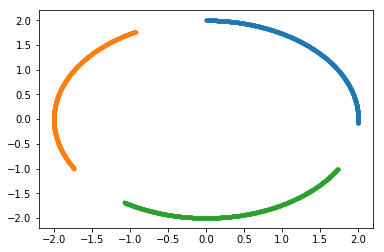

In [6]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
x3 = [d[0] for d in sim.setup.particles[2].location.data]
y3 = [d[1] for d in sim.setup.particles[2].location.data]
ax.plot(x1, y1,'.', x2, y2, '.', x3, y3, '.')

In [7]:
# system setup
m1 = 1
m2 = 10
m3 = 3
a = 2 * np.sqrt(3)
w = np.sqrt((m1 + m2 + m3)/a**3)
x1 = np.array([0, 2, 0])
x2 = np.array([-1 * np.sqrt(3), -1, 0])
x3 = np.array([np.sqrt(3), -1, 0])
xcm = (m1 * x1 + m2 * x2 + m3 * x3)/(m1 + m2 + m3)
r1 = np.sqrt(((x1-xcm)**2).sum())
r2 = np.sqrt(((x2-xcm)**2).sum())
r3 = np.sqrt(((x3-xcm)**2).sum())
rot = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 0]])

table = setup(0.1, 3)
table.add_particle(m1, x1, w * np.matmul(rot, x1-xcm))
table.add_particle(m2, x2, w * np.matmul(rot, x2-xcm))
table.add_particle(m3, x3, w * np.matmul(rot, x3-xcm))
sim = simulator(table)
sim.set_force("-G*m1*m2/(x**2)", {"G": 1})
sim.exec(100)

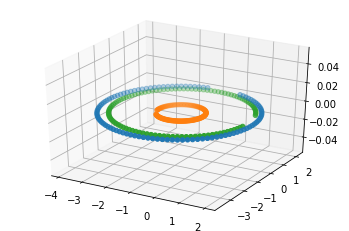

In [8]:
sim.trajectory()

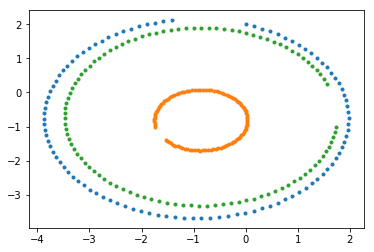

In [9]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
x3 = [d[0] for d in sim.setup.particles[2].location.data]
y3 = [d[1] for d in sim.setup.particles[2].location.data]
ax.plot(x1, y1,'.', x2, y2, '.', x3, y3, '.')

In [10]:
table = setup(0.01, 3)
v = np.sqrt((4+np.sqrt(2))/8)
u = v / np.sqrt(2)
table.add_particle(1, [1, 1, 0],  [-u, u, u])
table.add_particle(1, [-1, 1, 0],  [-u, -u, -u])
table.add_particle(1, [-1, -1, 0], [u, -u, 0])
table.add_particle(1, [1, -1, 0], [u, u, 0])
sim = simulator(table)
sim.exec(200)

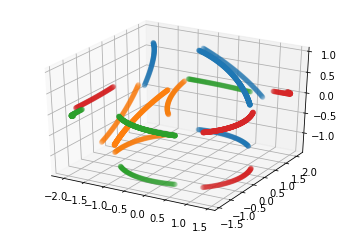

In [11]:
sim.trajectory(projection=True)

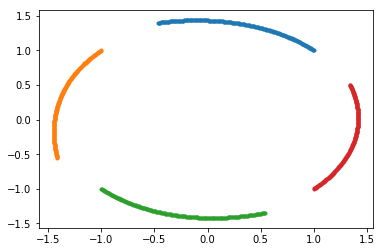

In [12]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
x3 = [d[0] for d in sim.setup.particles[2].location.data]
y3 = [d[1] for d in sim.setup.particles[2].location.data]
x4 = [d[0] for d in sim.setup.particles[3].location.data]
y4 = [d[1] for d in sim.setup.particles[3].location.data]
ax.plot(x1, y1,'.', x2, y2, '.', x3, y3, '.', x4, y4, '.')

## 2. Solarsyetem-like system

In [13]:
table = setup(0.01, 3)
table.add_particle(100000, [0, 0, 0],  [0, 0, 0])
table.add_particle(1, [-1, 0, 0],  [0, v, 0])
# table.add_particle(1, [-0.5, 0, 0],  [0, 0.1*v, 0])
# table.add_particle(1, [-1, 0, 0],  [0, v, 0])
sim = simulator(table)
sim.set_force("-C/(x**2)", {"C": 1})
sim.exec(1000)

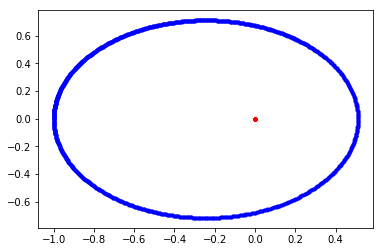

In [14]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
# x3 = [d[0] for d in sim.setup.particles[2].location.data]
# y3 = [d[1] for d in sim.setup.particles[2].location.data]
ax.plot(x1, y1,'r.', x2, y2, 'b.')

In [15]:
table = setup(0.01, 3)
table.add_particle(100000, [0, 0, 0],  [0, 0, 0])
table.add_particle(1, [-1, 0, 0],  [0, v, 0])
# table.add_particle(1, [-0.5, 0, 0],  [0, 0.1*v, 0])
# table.add_particle(1, [-1, 0, 0],  [0, v, 0])
sim = simulator(table)
sim.set_force("-C/(x**2)", {"C": 1})
sim.exec(1000)

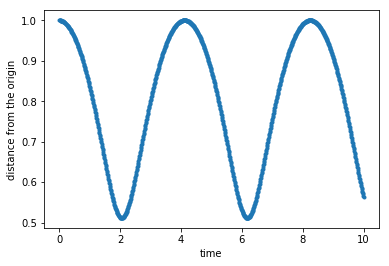

In [16]:
sim.setup.particles[1].location.plot_timeseries(3)

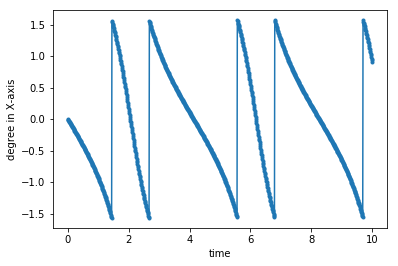

In [17]:
sim.setup.particles[1].location.plot_timeseries(4)

In [18]:
table = setup(0.01, 3)
table.add_particle(100000, [0, 0, 0],  [0, 0, 0])
table.add_particle(1, [-1, 0, 0],  [0, 1.7*v, 0])
sim = simulator(table)
sim.set_force("-C/(x**2)", {"C": 1})
sim.exec(1000)

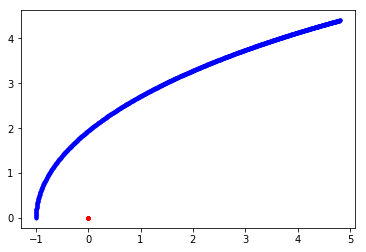

In [19]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
# x3 = [d[0] for d in sim.setup.particles[2].location.data]
# y3 = [d[1] for d in sim.setup.particles[2].location.data]
ax.plot(x1, y1,'r.', x2, y2, 'b.')

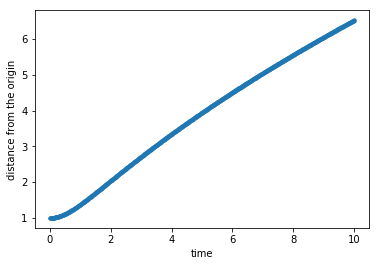

In [20]:
sim.setup.particles[1].location.plot_timeseries(3)

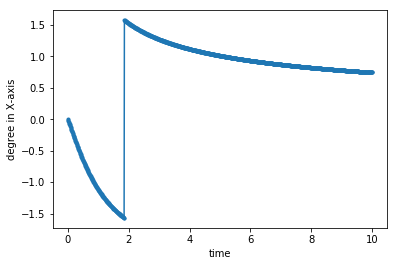

In [21]:
sim.setup.particles[1].location.plot_timeseries(4)

In [22]:
table = setup(36000, 3)
table.add_particle(1, [0, 0, 0],  [0, 0, 0])
v = 2 * np.pi / (365 * 24 * 3600)
u = 2 * np.pi * 0.0026/ (28 * 24 * 3600)
table.add_particle(1/332946, [1, 0, 0],  [0, v, 0])
table.add_particle(1/2223510, [1.0026, 0, 0],  [0, v - u, 0])
sim = simulator(table)
sim.set_force("-G*m1*m2/(x**2)", {"G": 3.9645 * 10**(-14)}) # Gravitational constant with [AU, Solarmass, second] unit system
sim.exec(1000)

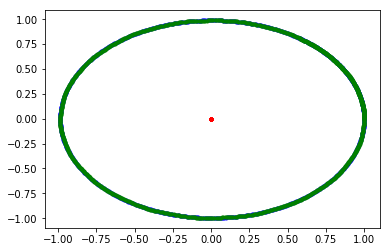

In [23]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
x3 = [d[0] for d in sim.setup.particles[2].location.data]
y3 = [d[1] for d in sim.setup.particles[2].location.data]

ax.plot(x1, y1,'r.', x2, y2, 'b.', x3, y3, 'g.')
# ax.plot( x2, y2, 'b.', x3, y3, 'g.')

In [24]:
table = setup(3600, 3)
table.add_particle(1, [0, 0, 0],  [0, 0, 0])
v = 2 * np.pi / (365 * 24 * 3600)
u = 2 * np.pi * 0.0026/ (28 * 24 * 3600)
table.add_particle(1/332946, [1, 0, 0],  [0, v, 0])
table.add_particle(1/2223510, [1.0026, 0, 0],  [0, v + u, 0])
sim = simulator(table)
sim.set_force("-G*m1*m2/(x**2)", {"G": 3.9645 * 10**(-14)})
sim.exec(24*27)

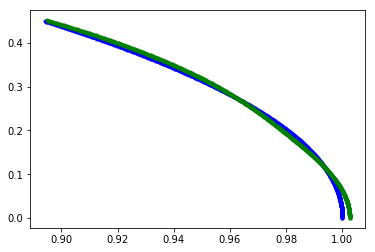

In [57]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
x3 = [d[0] for d in sim.setup.particles[2].location.data]
y3 = [d[1] for d in sim.setup.particles[2].location.data]

ax.plot( x2, y2, 'b.', x3, y3, 'g.')
# ax.plot( x2, y2, 'b.', x3, y3, 'g.')

## 3. Relativistic correction of Newton's Gravity (F~A/r^2 + B/r^4)

In [23]:
table = setup(0.01, 3)
table.add_particle(100000, [0, 0, 0],  [0, 0, 0])
table.add_particle(1, [1, 1, 0],  [-1 * v * np.sin(np.pi/6), v * np.cos(np.pi/6), 0])
sim = simulator(table)
sim.set_force("-C/(x**2) - D/(x**4)", {"C": 1, "D": 0.01})
sim.exec(5000)

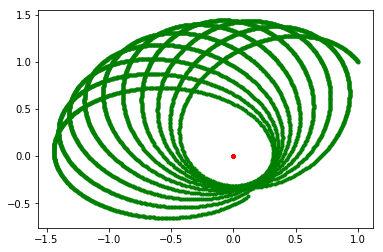

In [13]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
# x3 = [d[0] for d in sim.setup.particles[2].location.data]
# y3 = [d[1] for d in sim.setup.particles[2].location.data]
ax.plot(x1, y1,'r.', x2, y2, 'g.')

## 4. Scattering Problem with Coulomb Potential

In [17]:
table = setup(0.001, 3)
table.add_particle(100000, [0, 0, 0],  [0, 0, 0])
table.add_particle(1, [-10, 10, 0],  [1000, 0, 0])
table.add_particle(1, [-10, 5, 0],  [1000, 0, 0])
table.add_particle(1, [-10, 1, 0],  [1000, 0, 0])
table.add_particle(1, [-10, 0.1, 0],  [1000, 0, 0])
table.add_particle(1, [-10, 0.01, 0],  [1000, 0, 0])
sim = simulator(table)
sim.set_force("G*m1*m2/(x**2)", {"G": 1}) # Coulomb Potential
sim.exec(50)

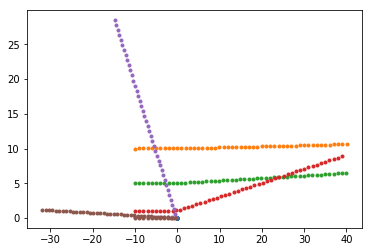

In [18]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
ax.plot(x1, y1,'r.', x2, y2, 'g.')

## 5. Exponential decaying orbit

In [201]:
table = setup(0.01, 3)
v = 0.5
table.add_particle(100000, [0, 0, 0],  [0, 0, 0])
table.add_particle(1, [1, 0, 0],  [v, v, 0])
sim = simulator(table)
sim.set_force("-C/(x**3)", {"C": 1})
sim.exec(268)

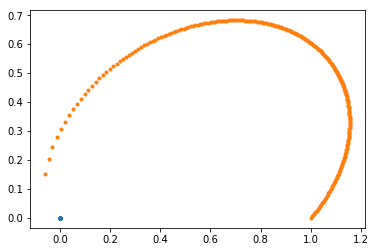

In [202]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
ax.plot(x1, y1, '.', x2, y2, '.')

## 6. rotating with spring (closed form Lissajous curve)

In [30]:
table = setup(0.01, 3)
v = 2
table.add_particle(100000, [0, 0, 0],  [0, 0, 0])
table.add_particle(1, [1, -1, 0],  [2*v, v, 0])
sim = simulator(table)
sim.set_force("-k*x", {"k": 10})
sim.exec(1200)

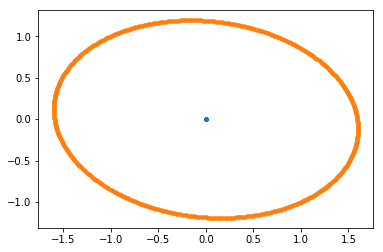

In [31]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
ax.plot(x1, y1, '.', x2, y2, '.')

## 7. free oscillotor (two, three bodies connected with spring)

In [237]:
table = setup(0.01, 3)
v = 0.5
table.add_particle(1, [0, 0, 0],  [0, 0, 0])
table.add_particle(1, [1, 0, 0],  [v, v, 0])
sim = simulator(table)
sim.set_force("-k*x", {"k": 10})
sim.exec(300)

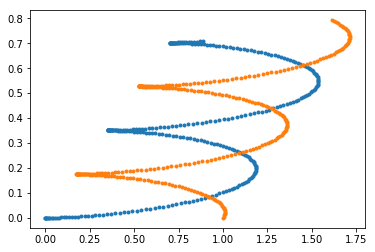

In [238]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
ax.plot(x1, y1, '.', x2, y2, '.')

In [49]:
table = setup(0.01, 3)
v = 0.5
table.add_particle(1, [0, 2, 0],  [2, 0, 0])
table.add_particle(1, [-1 * np.sqrt(3), -1, 0], [0, 0, 0])
table.add_particle(1, [np.sqrt(3), -1, 0], [0, 0, 0])
sim = simulator(table)
sim.set_force("-k*x", {"k": 10})
sim.exec(1000)

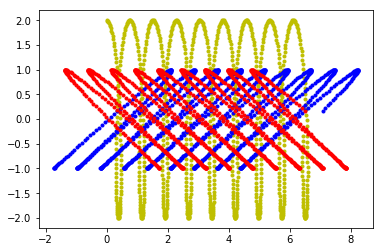

In [53]:
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
x3 = [d[0] for d in sim.setup.particles[2].location.data]
y3 = [d[1] for d in sim.setup.particles[2].location.data]
ax.plot(x1, y1, '.y', x2, y2, '.',  x3, y3, '.r')

## 8. explosion of charged dense gas

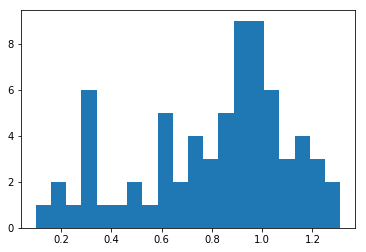

In [289]:
from random import random
table = setup(0.01, 2)
N = 70
m = 1
for i in range(N):
    table.add_particle(m, [random()*10, random()*10],  [random(), random()])
sim = simulator(table)
sim.set_force("1/(x**2)", {"k": 10})

v = []
for i in range(N):
    v.append(sim.setup.particles[i].velocity)
dat = [np.sqrt((np.array(vv)**2).sum()) for vv in v]
plt.hist(dat, 20)

sim.exec(1000)

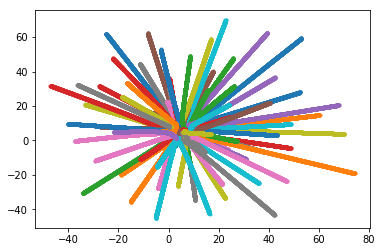

In [290]:
fig, ax = plt.subplots()
for i in range(N):
    x = [d[0] for d in sim.setup.particles[i].location.data]
    y = [d[1] for d in sim.setup.particles[i].location.data]
    ax.plot(x, y, '.')

(array([2., 1., 3., 3., 1., 6., 4., 2., 6., 5., 3., 8., 4., 7., 2., 3., 2.,
        2., 3., 3.]),
 array([0.64480683, 0.9810358 , 1.31726476, 1.65349372, 1.98972269,
        2.32595165, 2.66218062, 2.99840958, 3.33463854, 3.67086751,
        4.00709647, 4.34332544, 4.6795544 , 5.01578336, 5.35201233,
        5.68824129, 6.02447026, 6.36069922, 6.69692818, 7.03315715,
        7.36938611]),
 <a list of 20 Patch objects>)

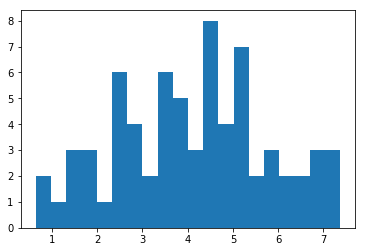

In [294]:
v = []
for i in range(N):
    v.append(sim.setup.particles[i].velocity)
dat = [np.sqrt((vv**2).sum()) for vv in v]
plt.hist(dat, 20)